In [42]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split



In [18]:
fish_df=pd.read_csv('Fish.csv')

In [19]:
fish_df.head()

,Category,Species,Weight,Height,Width,Length1,Length2,Length3
0,1,Bream,242.0,11.5200,4.0200,23.2,25.4,30.0
1,1,Bream,290.0,12.4800,4.3056,24.0,26.3,31.2
2,1,Bream,340.0,12.3778,4.6961,23.9,26.5,31.1
3,1,Bream,363.0,12.7300,4.4555,26.3,29.0,33.5
4,1,Bream,430.0,12.4440,5.1340,26.5,29.0,34.0


In [20]:
fish_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  159 non-null    int64  
 1   Species   159 non-null    object 
 2   Weight    159 non-null    float64
 3   Height    159 non-null    float64
 4   Width     159 non-null    float64
 5   Length1   159 non-null    float64
 6   Length2   159 non-null    float64
 7   Length3   159 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 10.1+ KB


In [21]:
fish_df.describe()

,Category,Weight,Height,Width,Length1,Length2,Length3
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,3.264151,398.326415,8.970994,4.417486,26.247170,28.415723,31.227044
std,1.704249,357.978317,4.286208,1.685804,9.996441,10.716328,11.610246
min,1.000000,0.000000,1.728400,1.047600,7.500000,8.400000,8.800000
25%,2.000000,120.000000,5.944800,3.385650,19.050000,21.000000,23.150000
50%,3.000000,273.000000,7.786000,4.248500,25.200000,27.300000,29.400000
75%,4.500000,650.000000,12.365900,5.584500,32.700000,35.500000,39.650000
max,7.000000,1650.000000,18.957000,8.142000,59.000000,63.400000,68.000000


In [22]:
fish_df.columns

Index(['Category', 'Species', 'Weight', 'Height', 'Width', 'Length1',
       'Length2', 'Length3'],
      dtype='object')

In [23]:
X=fish_df[['Category', 'Height', 'Width', 'Length1','Length2', 'Length3']]
y=fish_df['Weight']

In [24]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.8,random_state=2529)

In [25]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((31, 6), (128, 6), (31,), (128,))

In [26]:
model=RandomForestRegressor()

In [27]:
model.fit(X_train,y_train)

RandomForestRegressor()

In [28]:
model.predict(X_test)

array([ 388.75 ,  382.7  ,   59.63 ,  915.65 ,  141.85 ,  215.75 ,
        291.25 ,  276.55 ,  319.8  ,   12.898,   13.033,  326.7  ,
        138.56 ,  861.35 ,  739.1  ,  258.45 ,  502.6  ,  141.49 ,
        799.4  ,   66.89 ,   76.15 ,   32.748,  817.75 ,  844.1  ,
        895.7  ,   11.64 ,  317.85 ,  747.9  ,  320.45 ,  918.4  ,
        406.3  ,  381.7  ,  424.75 ,  597.4  ,   12.162,  955.75 ,
        878.45 ,   25.381,  237.05 ,  939.2  ,  661.2  ,  955.75 ,
        535.65 ,  699.7  ,  500.75 ,  254.35 ,  406.6  ,   26.528,
        681.85 ,  313.65 ,   44.965,  913.95 ,    9.895,  915.15 ,
        906.05 ,  434.85 ,  780.45 ,   45.04 ,  138.45 ,  912.95 ,
        146.34 ,   61.36 ,  637.7  ,   13.138,  275.85 ,  137.75 ,
        562.   ,  931.45 ,  118.56 ,  661.2  ,  951.45 ,  607.   ,
        196.   ,  220.75 ,  928.65 ,  268.8  ,  357.85 ,  882.05 ,
        955.75 ,  453.95 ,  110.87 ,  379.55 ,  149.   ,   74.33 ,
        882.05 ,  743.2  ,  743.5  ,  286.45 ,  183.6  ,  115.

In [33]:
#Perform different accuracy score tests on  RandomForestRegressor model

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean absolute error:", mae)
print("Mean squared error:", mse)
print("R-squared score:", r2)


Mean absolute error: 75.396625
Mean squared error: 17441.145492203126
R-squared score: 0.8522121176365325


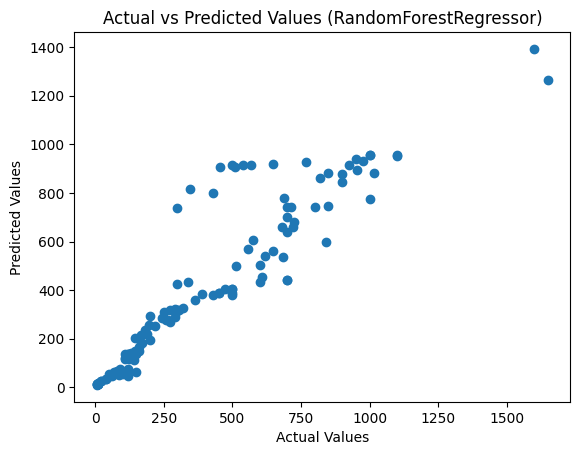

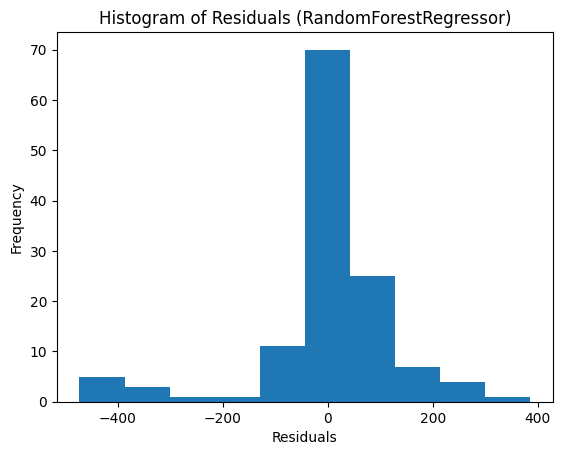

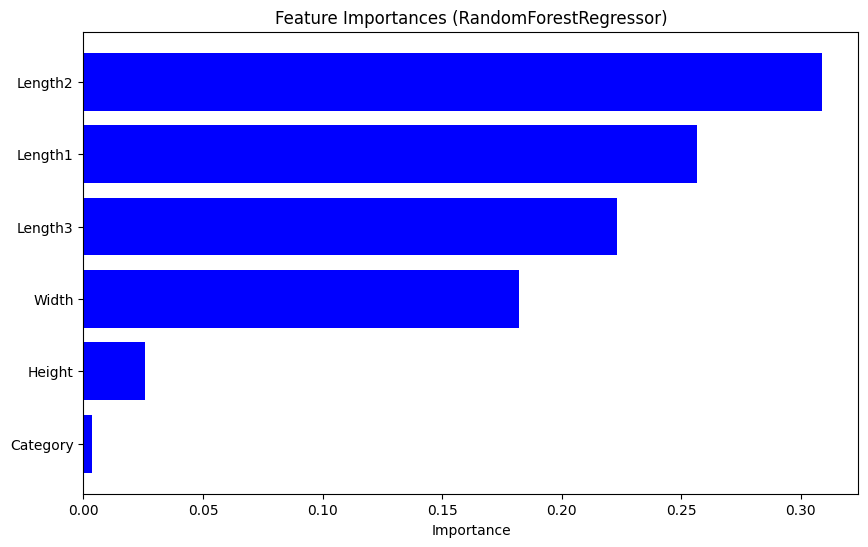

In [44]:
#The visualizatons of RandomForestRegressor model

import matplotlib.pyplot as plt

# Scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values (RandomForestRegressor)")
plt.show()
print()
# Histogram of the residuals
residuals = y_test - y_pred
plt.hist(residuals)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals (RandomForestRegressor)")
plt.show()
print()
# Feature importance plot
importances = model.feature_importances_
features = X_train.columns
indices = np.argsort(importances)

plt.figure(figsize=(10, 6))
plt.title("Feature Importances (RandomForestRegressor)")
plt.barh(range(len(features)), importances[indices], color="b", align="center")
plt.yticks(range(len(features)), features[indices])
plt.xlabel("Importance")
plt.show()
